## <center>Elements Of Data Science - F2022</center>
# <center>Week 6: Intro to Machine Learning Models Continued<center>
### <center>10/12/2021</center>

# TODOs

- Readings:
 - PDSH 05.03 [Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)
 - Recommended: PML Chapter 6 (Except for Pipelines) and [sklearn - model selection](https://scikit-learn.org/stable/model_selection.html)
 - Reference: PML Chapter Chap 3, 7, and [sklearn - supervised learning](https://scikit-learn.org/stable/supervised_learning.html)
<br/>


- Quiz 6, Due Tues Oct 18th, 11:59pm
- HW2 out end of *next* week
- **Midterm**
  - Review sheet in github repo
  - Online via gradescope, open-book, open-note, open-python
  - Released *Wednesday Oct 19th 11:59pm*
  - Due *Friday Oct 21st 11:59pm ET*
  - Have maximum of 24hrs after starting to finish
  - 30-40 questions (fill in the blank/multiple choice/short answer)
  - Questions asked/answered **privately** via Ed


# Current Timeline (subject to change)

- Midterm (Due Oct 21st)
- HW2     (Due Nov 4th)
- HW3     (Due Nov 18th)
- HW4     (Due Dec 2nd)
- Final   (Due Dec 9th)

# Don't Use Old Course Materials

- Do not use old course materials including quizzes, homeworks or exams
- *If there is reason to believe you are submitting work copied from an old course, you will get a 0 on that assignment*
<br>

- Using the current semester slides and readings is acceptable (though I recommend not just copying)

# Quiz 4 Common Mistakes

- include instructions with submission
- `.info()` not `.info`
- Pandas `.sample()` default `n=1`: need to set `n=` or `frac=`
<br>

I'll start taking off points for errors I point out in class.


# Today

- Review Linear Models
- Distance Based: kNN
- Tree Based: Decision Tree
- Ensembles: Bagging, Boosting, Stacking
- Multiclass/Multilabel and One Vs. Rest Classification
- Model Review


<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Environment Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LinearRegression,LogisticRegression

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
def my_plot_decision_regions(X,y,model,figsize=(8,8),ax=None):
    '''Plot classifier decision regions, classification predictions and training data'''
    if not ax:
        fig,ax = plt.subplots(1,1,figsize=figsize)
    # use mlxtend plot_decision_regions
    model = model.fit(X.values,y.values)
    plot_decision_regions(X.values,y.values,model,ax=ax)
    ax.set_xlabel(X.columns[0]); ax.set_ylabel(X.columns[1]);
    
def my_plot_regression(X,y,model,label='yhat',figsize=(8,8),ax=None):
    '''Plot regression predictions and training data'''
    # generate test data and make predictions
    X_test = np.linspace(X.iloc[:,0].min(),X.iloc[:,0].max(),1000).reshape(-1,1)
    model = model.fit(X.values,y.values)
    y_hat = model.predict(X_test)
    fig,ax = plt.subplots(1,1,figsize=figsize)
    ax.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
    ax.plot(X_test, y_hat, color="cornflowerblue", label=label, linewidth=2)
    ax.set_xlabel(X.columns[0]); ax.set_ylabel(y.name); ax.legend();

# Linear Models  (Review)

- Simple/Multiple Linear Regression
- Logistic Regression
- SVM
- Perceptron, Multi-Layer Perceptron

# Wine as Binary Classification

In [3]:
df_wine = pd.read_csv('../data/wine_dataset.csv',usecols=['alcohol','ash','proline','hue','class'])
# rename 'class' as 'target', since class is a reserved python word
df_wine = df_wine.rename({'class':'target'},axis=1)

df_wine_2c = df_wine[df_wine.target < 2] # only keep classes 0 and 1

X_2c = df_wine_2c[['proline','hue']]
y_2c = df_wine_2c['target']

zscore = lambda x: (x-x.mean()) / x.std()

X_2c_zscore = X_2c.apply(zscore,axis=0)
alcohol_2c_zscore = zscore(df_wine_2c.alcohol)

y_2c.value_counts().sort_index()

0    59
1    71
Name: target, dtype: int64

# Distance Based: k-Nearest Neighbor (kNN)
<br>
- What category do most of the $k$ nearest neighbors belong to?
<br>
<br>
<br>
<div align="center"><img src="images/knn_classifier.png" width="600px"></div>

From PML

# KNN in sklearn

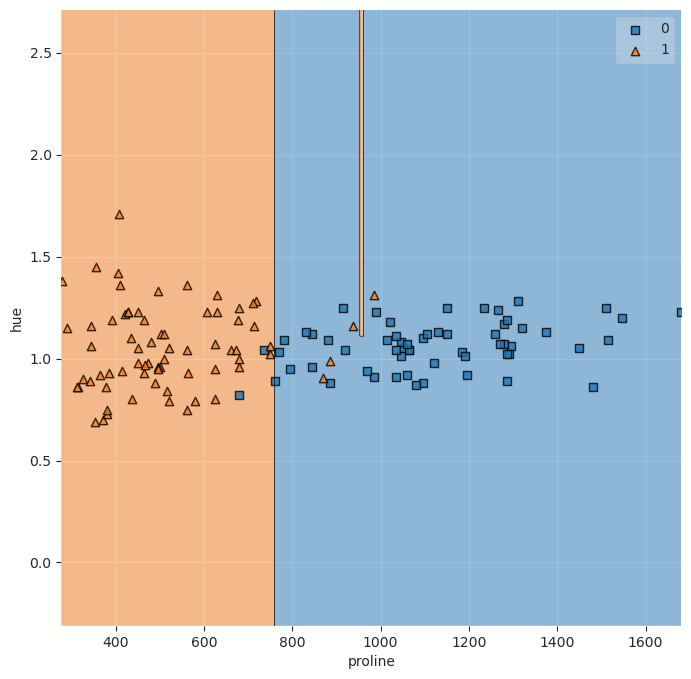

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_2c,y_2c)

my_plot_decision_regions(X_2c,y_2c,knn)

# Effects of Standardization on Distance Based Methods

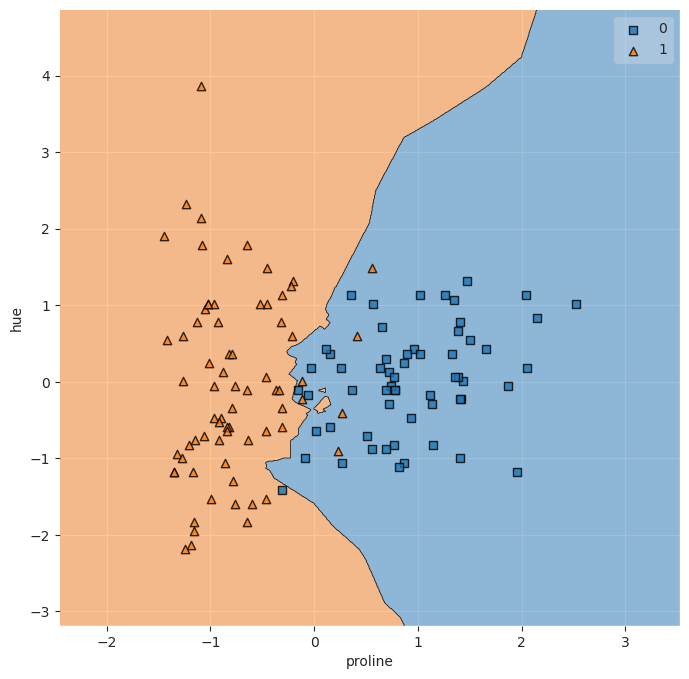

In [5]:
knn_z = KNeighborsClassifier(n_neighbors=3)
knn_z.fit(X_2c_zscore,y_2c)

my_plot_decision_regions(X_2c_zscore,y_2c,knn_z)

# Curse of Dimensionality

The more dimensions, the less likely points are "close" to each other.

In [6]:
# From Data Science From Scratch by Joel Grus

def random_distances(dim,num_pairs=10_000):
    return np.sqrt(np.square(np.random.rand(num_pairs,dim) - np.random.rand(num_pairs,dim)).sum(axis=1))

# calculate average and minimum distance for 1 to 100 dimensions
dimensions = range(1,100)
avg_distances = []
min_distances = []
min_avg_ratio = []
np.random.seed(0)
for d in dimensions:
    distances = random_distances(d)
    avg_distances.append(distances.mean())
    min_distances.append(distances.min())
    min_avg_ratio.append(distances.min() / distances.mean())

# Curse of Dimensionality Cont.


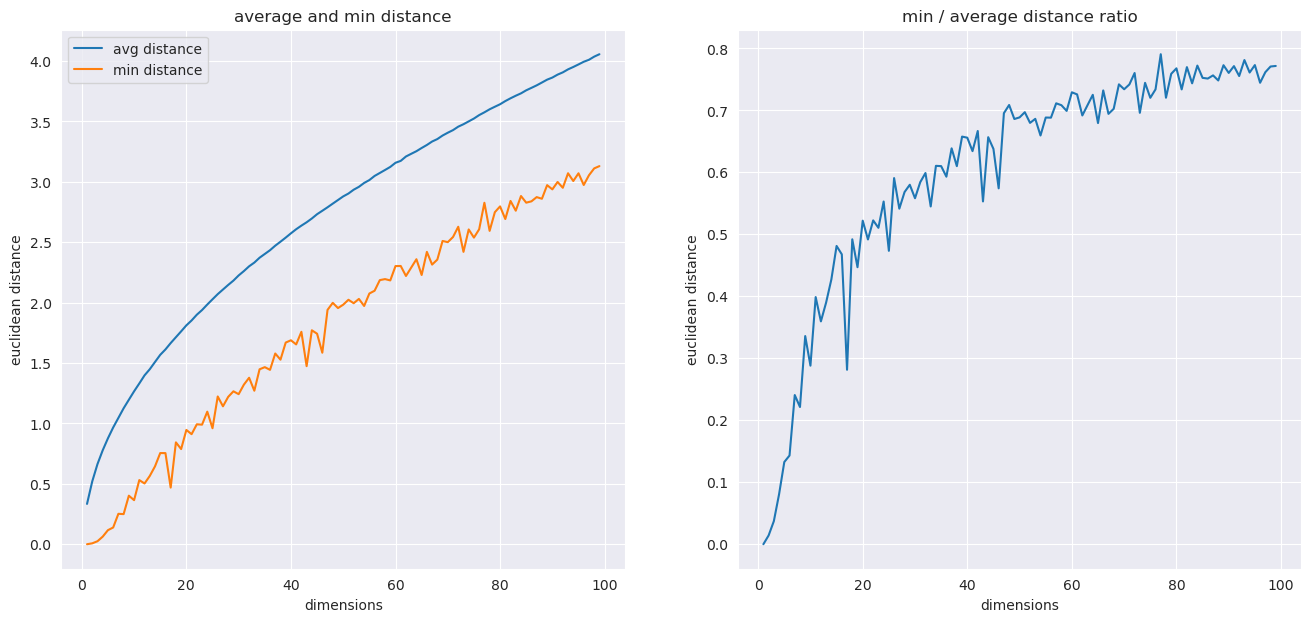

In [7]:
fig,ax = plt.subplots(1,2,figsize=(16,7))
ax[0].plot(dimensions,avg_distances,label='avg distance');
ax[0].plot(dimensions,min_distances,label='min distance');
ax[0].legend()
ax[0].set_title('average and min distance'); ax[0].set_xlabel('dimensions'); ax[0].set_ylabel('euclidean distance');
ax[1].plot(dimensions,min_avg_ratio)
ax[1].set_title('min / average distance ratio'); ax[1].set_xlabel('dimensions'); ax[1].set_ylabel('euclidean distance');

# Regression with kNN

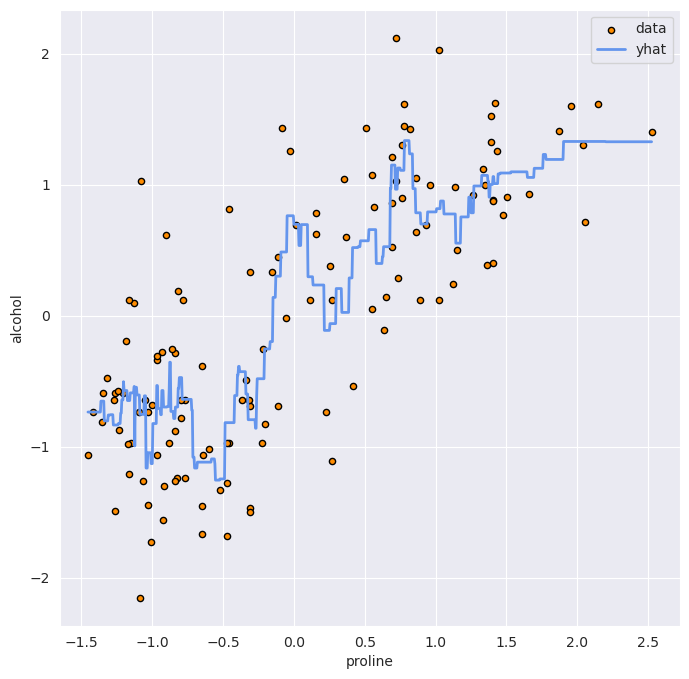

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_2c_zscore[['proline']],alcohol_2c_zscore)

my_plot_regression(X_2c_zscore[['proline']],alcohol_2c_zscore,knnr)

In [9]:
X_2c_proline_sample = X_2c_zscore.iloc[:5].loc[:,['proline']].values
yhat = knnr.predict(X_2c_proline_sample).round(2)
pd.DataFrame({'proline':X_2c_proline_sample[:,0],'yhat':yhat}).round(2)

,proline,yhat
0,0.78,1.34
1,0.74,1.13
2,1.12,0.78
3,1.96,1.33
4,-0.16,-0.20


# Decision Tree

- What answer does a series of yes/no questions lead us to?
<br>
<br>

<div align="center"><img src="images/decisiontree_smallexample.png" width="800px"></div>

From PML

# Decision Tree Classifier in sklearn

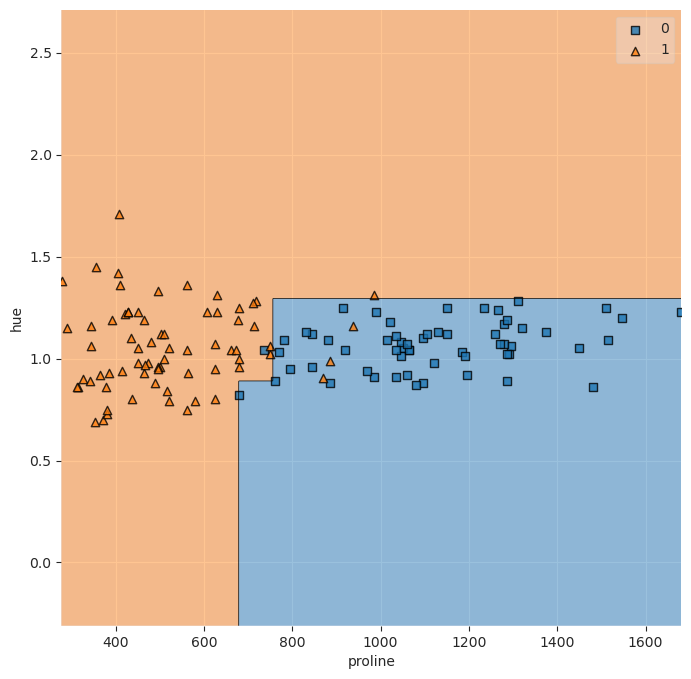

In [10]:
from sklearn.tree import DecisionTreeClassifier

dtc_md3 = DecisionTreeClassifier(max_depth=3) # max_depth: max number of questions
dtc_md3.fit(X_2c,y_2c)

my_plot_decision_regions(X_2c,y_2c,dtc_md3)

# Building a Decision Tree
<br>

- How to decide which question to choose (eg. Should I choose question A or B)?
- **Reduce Impurity**

<div align="center"><img src="images/decisiontree_impurity.png"></div>

From PML

- Information Gain: Tie, *Gini*: B, Entropy: B

In [11]:
df = pd.DataFrame([[0,.2,0],[0,.7,0],[1,.7,1]],columns=['feature1','feature2','target'])
display(df)

# Is feature1 equal to 0?
print(df[df.feature1 == 0].target.values)
print(df[df.feature1 != 0].target.values)
print()

# Is feature2 <= .2?
print(df[df.feature2 <= .2].target.values)
print(df[df.feature2 >  .2].target.values)

,feature1,feature2,target
0,0,0.2,0
1,0,0.7,0
2,1,0.7,1


[0 0]
[1]

[0]
[0 1]


# Plot Learned Decision Tree Using sklearn

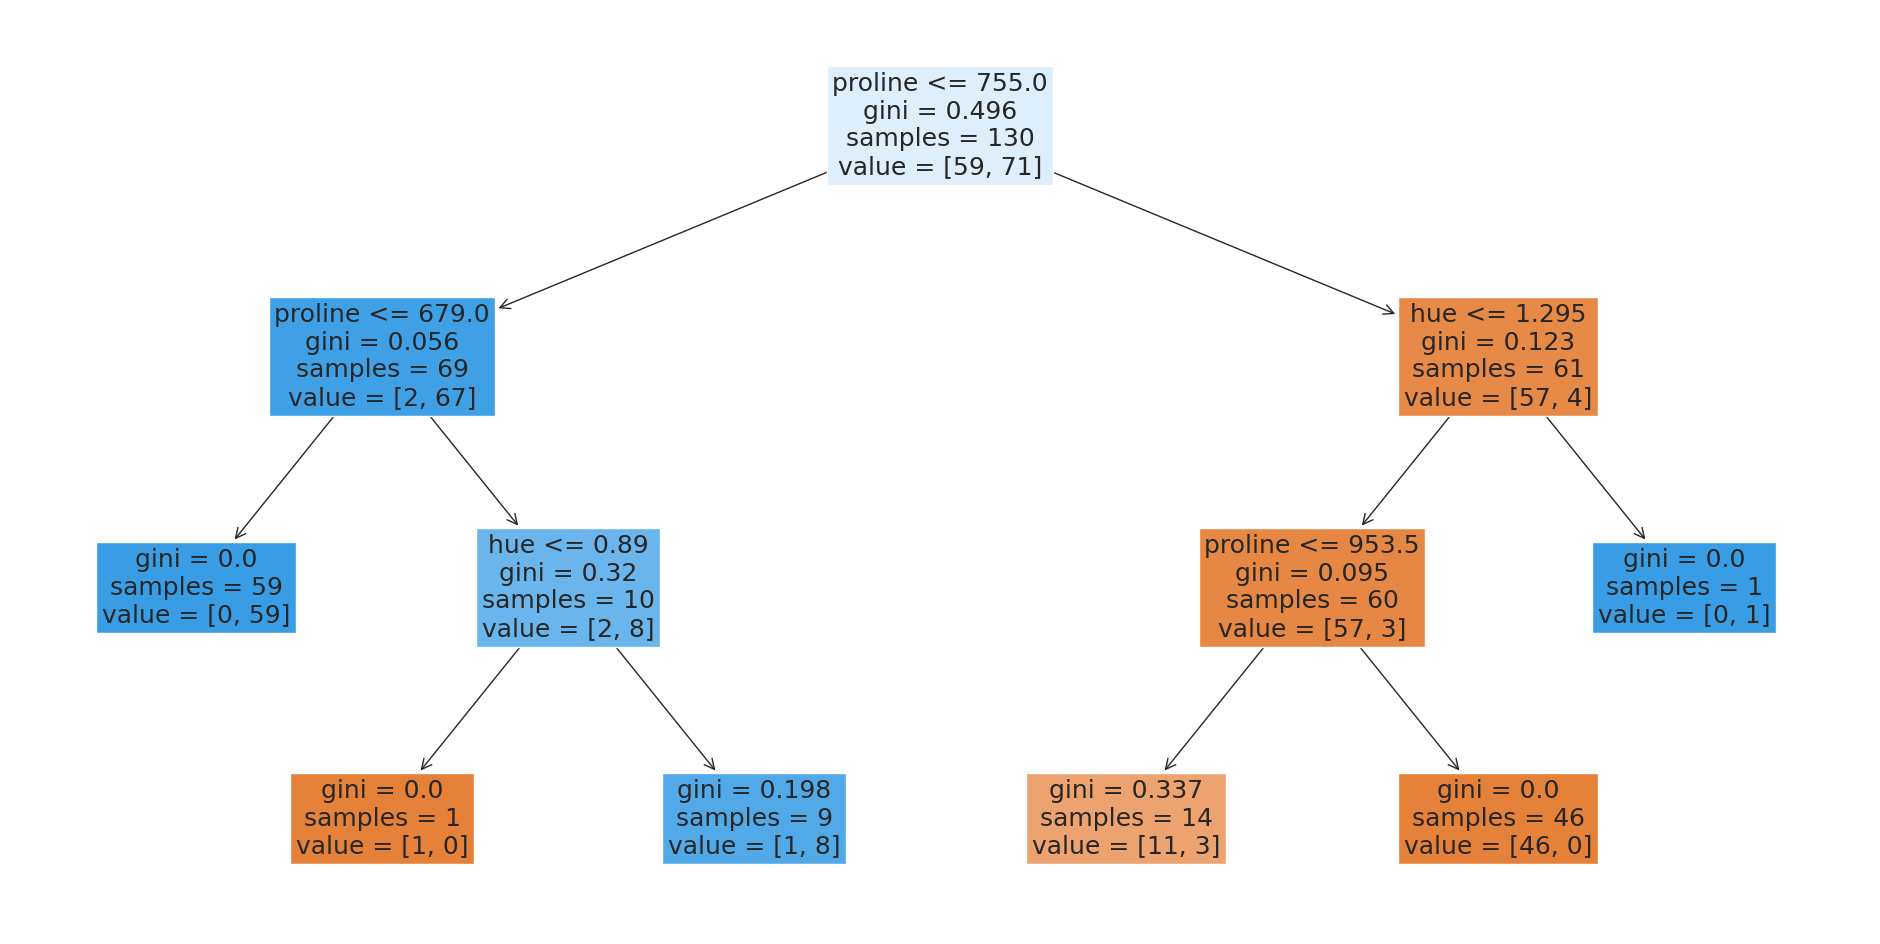

In [12]:
from sklearn.tree import plot_tree
fig,ax = plt.subplots(1,1,figsize=(24,12))
plot_tree(dtc_md3,ax=ax,fontsize=18,feature_names=X_2c.columns,filled=True);

# Decision Tree: Increase Maximum Depth

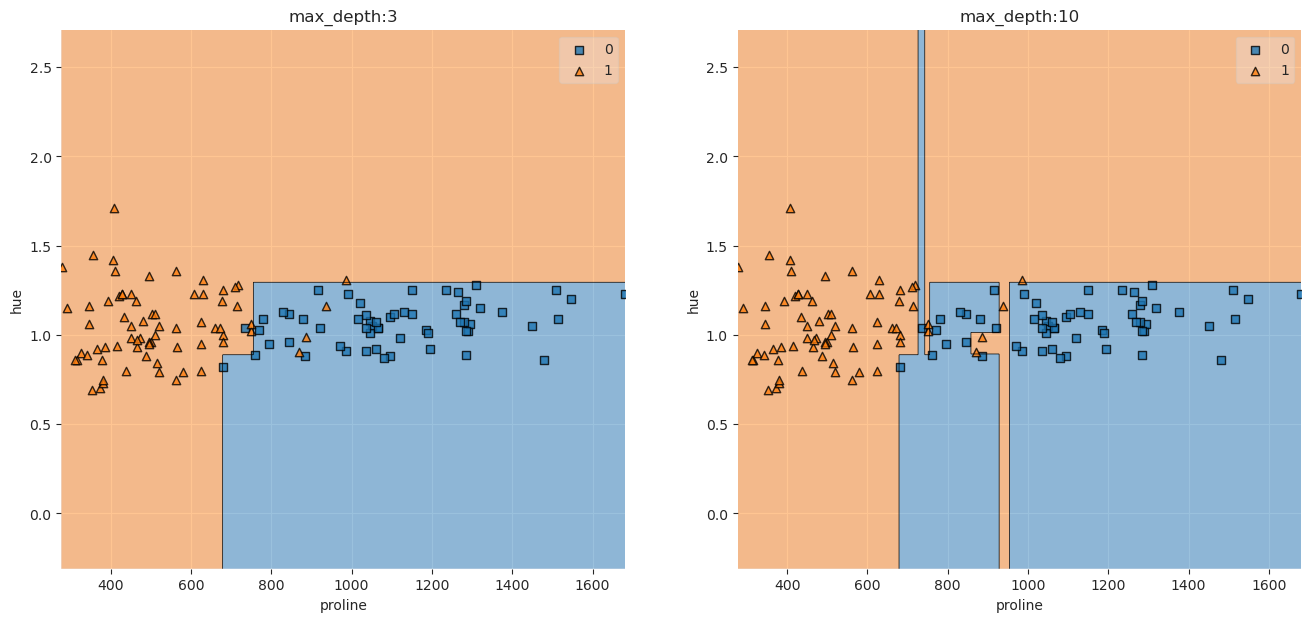

In [13]:
dtc_md10 = DecisionTreeClassifier(max_depth=10)
dtc_md10.fit(X_2c,y_2c)

fig,ax = plt.subplots(1,2,figsize=(16,7))
my_plot_decision_regions(X_2c, y_2c, model=dtc_md3, ax=ax[0]);
my_plot_decision_regions(X_2c, y_2c, model=dtc_md10, ax=ax[1]);
ax[0].set_title('max_depth:3');ax[1].set_title('max_depth:10');

# Plot Learned Decision Tree Using sklearn
<br>
- For tree with max_depth=10

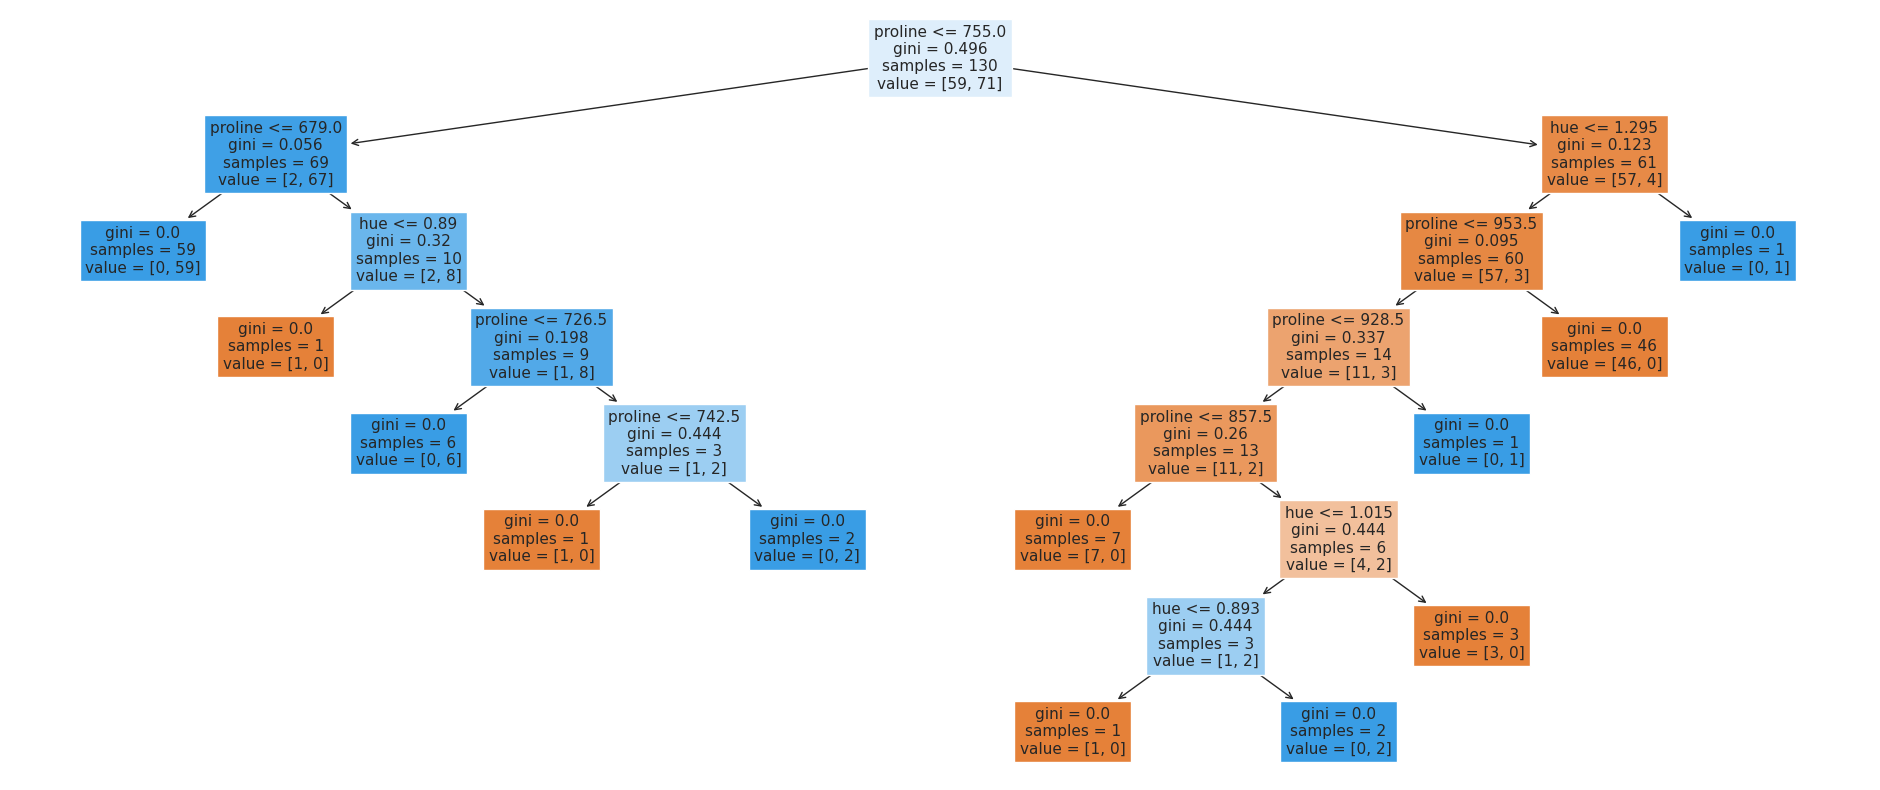

In [14]:
fig,ax = plt.subplots(1,1,figsize=(24,10))
plot_tree(dtc_md10,ax=ax,fontsize=11,feature_names=X_2c.columns,filled=True);

# Regression with Decision Trees

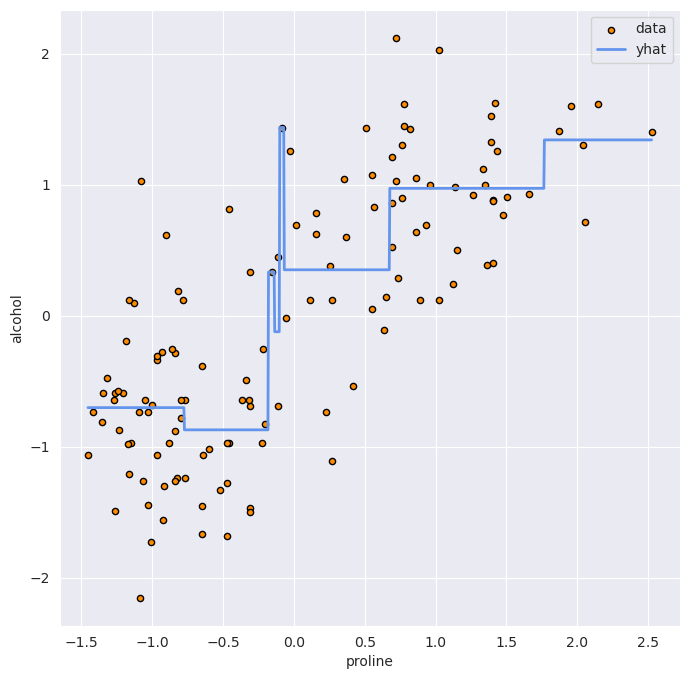

In [15]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X_2c_zscore[['proline']],alcohol_2c_zscore)

my_plot_regression(X_2c_zscore[['proline']],alcohol_2c_zscore,dtr)

# Ensemble Methods
<br>

- "Wisdom of the crowd"
- Can often achieve better performance with collection of learners
- Often use shallow trees as base learners

Common methods for generating ensembles:
<br>

- **Bagging** (Bootstrap Aggregation)
 - Random Forest
- **Boosting**
 - Gradient Boosting
- **Stacking**

# Random Forest and Gradient Boosted Trees
<br>

<div align="center"><img src="images/Architecture-of-the-random-forest-model.png" width="1000px"></div>

<font size=4>From https://www.researchgate.net/publication/301638643_Electromyographic_Patterns_during_Golf_Swing_Activation_Sequence_Profiling_and_Prediction_of_Shot_Effectiveness</font>

# Bagging with Random Forests
<br>

- Trees built with bootstrap samples and subsets of features
- Achieve variation with random selection of observations and features
<br>
<br>

<div align="center"><img src="images/bagging.png" width="700px"></div>

From PML

# Random Forests with sklearn

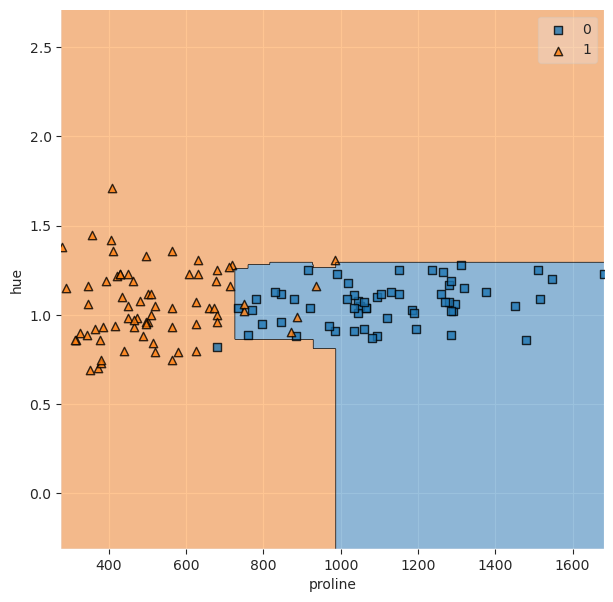

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, # number of trees in ensemble
                             max_depth=3,     # same as decision trees
                             n_jobs=-1,       # parallelize using all available cores, default: None=1
                             random_state=0)  # for demonstration only    
rfc.fit(X_2c,y_2c)
my_plot_decision_regions(X_2c,y_2c,rfc,figsize=(7,7))

# Regression with RandomForests

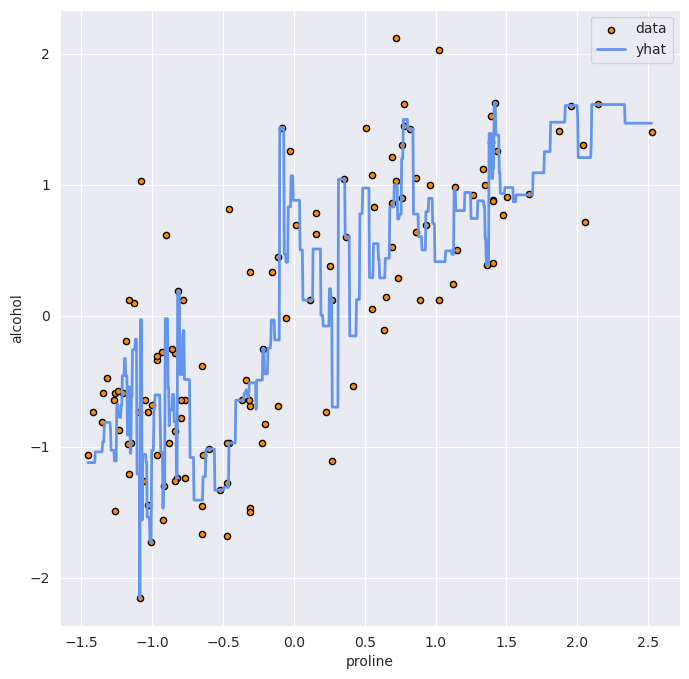

In [17]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=3, n_jobs=-1)
rfr.fit(df_wine[['proline']],df_wine.alcohol)

my_plot_regression(X_2c_zscore[['proline']],alcohol_2c_zscore,rfr)

# Gradient Boosted Trees
<br>

- Trees built by adding weight to mis-classification
- Achieve variation due to changes in weights on observations
<br>

<div align="center"><img src="images/boosting.png" width="600px"></div>

From PML

# Gradient Boosted Trees in sklearn

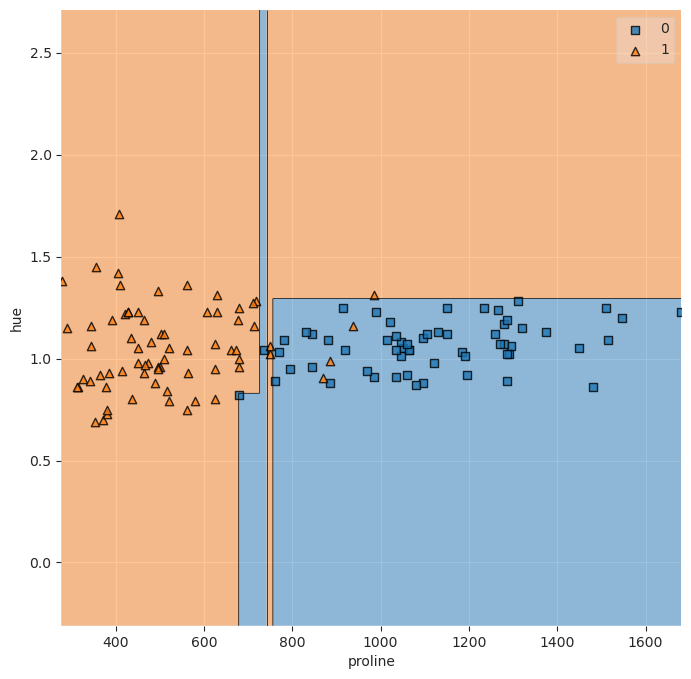

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10)
gbc.fit(X_2c,y_2c)

my_plot_decision_regions(X_2c,y_2c,gbc)

# Regression with Gradient Boosted Trees

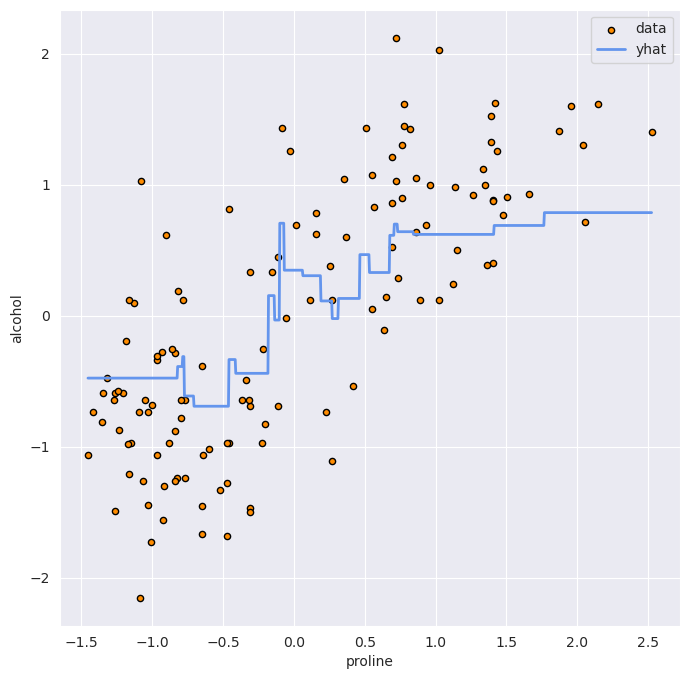

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=10)
gbr.fit(X_2c_zscore[['proline']],alcohol_2c_zscore)

my_plot_regression(X_2c_zscore[['proline']],alcohol_2c_zscore,gbr)

# Stacking
<br>

<div align="center"><img src="images/modelstacking.png" width="900px"></div>

<font size=5>From https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/</font>

# Stacking for Classification

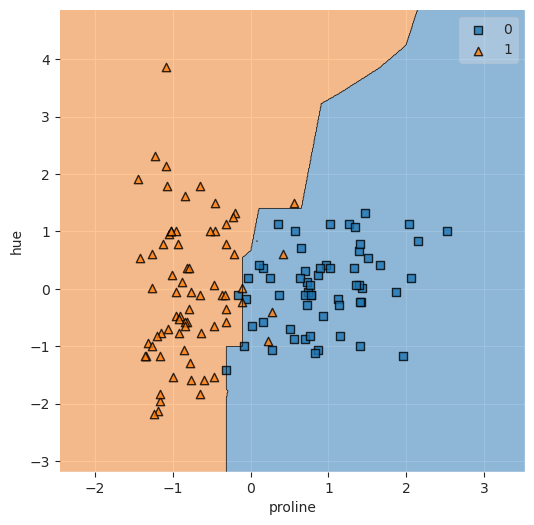

In [20]:
from sklearn.ensemble import StackingClassifier

ensemble = [('lr',LogisticRegression(max_iter=1000)),
            ('dt',DecisionTreeClassifier(max_depth=3)),
            ('knn',KNeighborsClassifier(n_neighbors=3))]

stackc = StackingClassifier(estimators=ensemble,
                         final_estimator=LogisticRegression())
stackc.fit(X_2c_zscore,y_2c)

my_plot_decision_regions(X_2c_zscore,y_2c,stackc,figsize=(6,6))

# Stacking for Regression

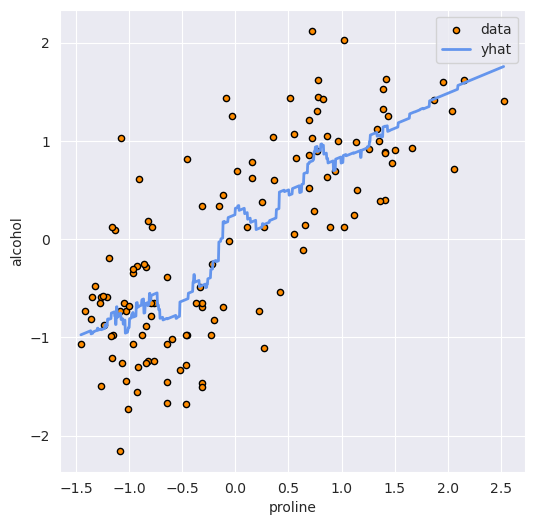

In [21]:
from sklearn.ensemble import StackingRegressor

ensemble = [('lr',LinearRegression()),
            ('dt',DecisionTreeRegressor(max_depth=3)),
            ('knn',KNeighborsRegressor(n_neighbors=6))]

stackr = StackingRegressor(estimators=ensemble,
                           final_estimator=LinearRegression())
stackr.fit(X_2c_zscore[['proline']],alcohol_2c_zscore)

my_plot_regression(X_2c_zscore[['proline']],alcohol_2c_zscore,stackr,figsize=(6,6))

# Wine as Multi-Class Classification

In [22]:
X_mc = df_wine[['proline','hue']]
y_mc = df_wine.target

X_mc_zscore = X_mc.apply(zscore,axis=0)
alcohol_mc_zscore = zscore(df_wine.alcohol)

y_mc.value_counts().sort_index()

0    59
1    71
2    48
Name: target, dtype: int64

# Multiclass and Multilabel

- **Multiclass Classification** : more than two categories/classes
 - red/green/blue, flower type, integer 0-10
<br>

- **Multilabel Classification** : can assign more than one category to an instance
 - paper topics, entities in image
<br>
<br>
- <font color="gray">**Multiclass-Multilabel/Multitask Classification**</font> : >1 one property with >2 one categories
 - type of fruit AND color of fruit
<br>
- <font color="gray">**Multioutput Regression**</font> : more than one numeric targets
 - temperature AND humidity

See sklearn docs (https://scikit-learn.org/stable/modules/multiclass.html#)

# Sklearn Inherantly Multiclass

 - `LogisticRegression(multi_class='multinomial')`
 - `KNeighborsClassifier`
 - `DecisionTreeClassifier`
 - `RandomForestClassifier`


In [23]:
dt_mc = DecisionTreeClassifier().fit(X_mc_zscore,y_mc) # fit on multiclass

# generate 3 predictions
y_hats = dt_mc.predict(X_mc_zscore.iloc[[82,15,166]]) 

# display target and prediction
pd.DataFrame({'y':y_mc.iloc[[82,15,166]],'y_hat':y_hats})

,y,y_hat
82,1,1
15,0,0
166,2,2


# One Vs. Rest (OvR) Classification For Multiclass

- What about other models (eg Perceptron)?
<br>

- Can use any binary classifier for Multiclass classification by training multiple models:

 - model 1 : class 1 vs (class 2 and class 3)
 - model 2 : class 2 vs (class 1 and class 3)
 - model 3 : class 3 vs (class 1 and class 2)
<br>
<br>

- Then
 - Predict $\hat{y}$ using the model with highest $P(y=\hat{y}\mid x)$, or distance from boundary, or ...
<br>
<br>


# Sklearn OvR for Multiclass

- `LogisticRegression(multi_class=”ovr”)`
- `GradientBoostingClassifier`
- `Perceptron`


# OvR For Logistic Regression

In [24]:
logr_mc = LogisticRegression(multi_class='ovr', # default
                             max_iter=1000)     # to avoid timeout errors
logr_mc.fit(X_mc_zscore,y_mc)
y_hats = logr_mc.predict(X_mc_zscore.iloc[[82,15,166]]) # generate 3 predictions
y_prob = logr_mc.predict_proba(X_mc_zscore.iloc[[82,15,166]])
pd.DataFrame({'y_hat':y_hats,'p_c1':y_prob[:,0],'p_c2':y_prob[:,1],'p_c3':y_prob[:,2]})\
 .style.background_gradient(subset=['p_c1','p_c2','p_c3']).format('{:.2f}',subset=['p_c1','p_c2','p_c3'])

,y_hat,p_c1,p_c2,p_c3
0,1,0.15,0.85,0.00
1,0,0.97,0.03,0.00
2,2,0.18,0.34,0.48


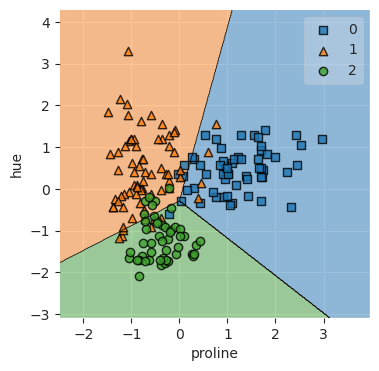

In [25]:
my_plot_decision_regions(X_mc_zscore,y_mc,logr_mc,figsize=(4,4))

# One vs. One Classification

- Train one classifier for each pair-wise comparison of classes
<br>

- `SVC`

# Sklearn `Multiclass` meta-estimators

- **Note:** All classifiers in scikit-learn do multiclass classification out-of-the-box. You don’t need to use the sklearn.multiclass module unless you want to experiment with different multiclass strategies.

# Inherantly Multilabel (aka Multioutput)

- `KNeighborsClassifier`
- `DecisionTreeClassifier`
- `MLPClassifier`
- `RandomForestClassifier`
<br>

In [26]:
X_ml = X_mc[['proline']].iloc[-3:] # get 3 samples
y_ml = np.array([[1, 0, 1], [0, 1, 1], [0, 0, 0]]) # generate 3 sets of random multi-labels for demonstration

dt_ml = DecisionTreeClassifier(max_depth=1).fit(X_ml,y_ml) # fit multilabel 
dt_ml.predict(X_ml)

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 0]])

# Sklearn `MultiOutputClassifier` meta-estimator

- fits one classifier per target (One vs. Rest)

In [27]:
from sklearn.multioutput import MultiOutputClassifier

# wrap your classifier with MultiOutputClassifier
mc_logr = MultiOutputClassifier(LogisticRegression())
mc_logr.fit(X_ml,y_ml)
mc_logr.predict(X_ml)

array([[0, 0, 1],
       [1, 1, 1],
       [0, 0, 0]])

<br>
<br>

# <center>Review of Models</center>
<br>
<br>

# Model Review: Simple/Multiple Linear Regression

- Use for: Regression
- Pros:
 - fast to train
 - interpretable coefficients
- Cons:
 - assumes linear relationship
 - depends on removing colinear features
 <br>
 <br>
 
 
<div align="center"><img src="images/simple_linear_regression.png" width="400px"></div>
<font size=4>from PML</font>

# Model Review: Logistic Regression
    
- Use for: Classification
- Pros:
 - fast to train
 - interpretable coefficients (log odds)
- Cons:
 - assumes linear boundary
 - depends on removing colinear features
<br>
<br>
 
<div align="center"><img src="images/logistic_regression.png" width="400px"></div>

<font size=4>from PML</font>

# Model Review: Support Vector Machine (SVM)

- Use for: Classification and Regression

- Pros:
 - fast to evaluate
 - can use kernel trick to learn non-linear functions
- Cons:
 - slow to train
 - can fail to converge on very large datasets
<br>

<div align="center"><img src="images/which_hyperplane.png" width="700px"></div>
<font size=4>from PML</font>
 

# Model Review: Multi-Layer Perceptron

- Use for Classification or Regression
- Pros:
 - non-linear boundary
- Cons:
 - non-convex loss function (sensitive to initial weights)
 - sensitive to feature scaling
 - no GPU support in sklearn: use tensorflow or pytorch
<br>

<div align="center"><img src="images/multilayerperceptron_network.png" width="300px"></div>

<font size=4>From https://scikit-learn.org/stable/_images/multilayerperceptron_network.png</font>

# Model Review: k Nearest Neighbor (kNN)
    
- Use for: Classification or Regression
- Pros:
 - fast to train
 - non-linear boundary
- Cons:
 - potentially slow to predict
 - curse of dimensionality
<br>

<div align="center"><img src="images/knn_classifier.png" width="400px"></div>
<font size=4>From PML</font>

# Model Review: Decision Tree

- Use for: Classification or Regression
- Pros:
 - very interpretable
 - quick to predict
 - can handle numeric and categorical variables without transformation
- Cons:
 - tendency to overfit (learn training set too well, more next class!)
<br>
<br>

<div align="center"><img src="images/decisiontree_smallexample.png" width="400px"></div>

<font size=4>From PML</font>

# Model Review: Random Forest (Ensemble via Bagging)

- Use for: Classification or Regression
- Pros:
 - less likely to overfit than decision tree
 - quick to train (through parallelization, quick to predict)
- Cons:
 - less interpretible, though still possible
<br>
<br>

<div align="center"><img src="images/Architecture-of-the-random-forest-model.png" width="600px"></div>

<font size=4>From https://www.researchgate.net/publication/301638643_Electromyographic_Patterns_during_Golf_Swing_Activation_Sequence_Profiling_and_Prediction_of_Shot_Effectiveness</font>

# Model Review: Gradient Boosted Trees (Ensemble via Boosting)

- Use for: Classification or Regression

- Pros:
 - pays more attention to difficult decision regions
 - quick to predict
 - tends to work well on difficult tasks
- Cons:
 - slow to train (parallelization not possible)
 - less interpretible, though still possible
<br>

<div align="center"><img src="images/boosting.png" width="300px"></div>
<font size=4>From PML</font>

# Model Review: Ensemble via Stacking
    
- Use for: Classification or Regression

- Pros:
 - combines benefits of multiple learning types
 - easy to implement
 - tends to win competitions
- Cons:
 - difficult to interpret
 - training/prediction time depends on component models
<br>
<br>

<div align="center"><img src="images/modelstacking.png" width="200px"></div>

<font size=5>From https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/</font>

# Neural Networks (aka Deep Learning)
<br>

- Pros and Cons of Deep Learning
 - sensitive to initialization and structure
 - high complexity -> needs more data
 - low interpretability
 - can learn complex interactions
 - performs well on tasks involving complex signals (ex images, sound, etc)
<br>
 
<div align="center"><img src="images/deep_neural_net.png" width="700px"></div>

# Playing with synthetic classification datasets

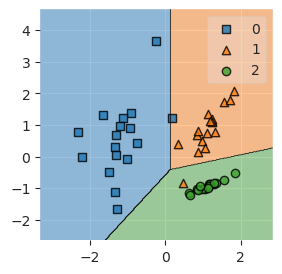

In [28]:
from sklearn.datasets import make_classification, make_multilabel_classification

X_syn,y_syn = make_classification(n_samples=50,
                                  n_features=2,
                                  n_informative=2,
                                  n_redundant=0,
                                  n_clusters_per_class=1,
                                  class_sep=1,
                                  n_classes=3,
                                  random_state=0,
                                 )
fig,ax = plt.subplots(1,1,figsize=(3,3))
plot_decision_regions(X_syn,y_syn,LogisticRegression().fit(X_syn,y_syn));

# Playing with synthetic classification datasets - multilabel

In [29]:
X_syn_ml,y_syn_ml = make_multilabel_classification(n_samples=100,
                                                   n_features=2,
                                                   n_classes=5,
                                                   random_state=0
                                                  )
print(X_syn_ml[:10])
print()
print(y_syn_ml[:10])

[[24. 25.]
 [38. 15.]
 [39. 14.]
 [23. 20.]
 [26. 29.]
 [30. 16.]
 [22. 30.]
 [25. 22.]
 [29. 12.]
 [25. 21.]]

[[0 0 0 0 0]
 [0 0 1 0 1]
 [0 1 1 1 1]
 [1 1 1 1 1]
 [1 0 0 1 0]
 [0 1 0 1 1]
 [1 0 0 0 0]
 [1 1 1 1 0]
 [0 0 0 0 0]
 [0 0 1 1 0]]


<br>
<br>

# <center>Questions?</center>
<br>
<br>